In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Choose a Binary Classification Dataset

In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/cancer/data.csv')

# Drop irrelevant columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)

# Map target column to binary values
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


Train/Test Split and Standardize Features

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Fit a Logistic Regression Model

In [5]:
from sklearn.linear_model import LogisticRegression

# Train model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

Evaluate with Confusion Matrix, Precision, Recall, ROC-AUC

Confusion Matrix:
 [[70  1]
 [ 2 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC Score: 1.00


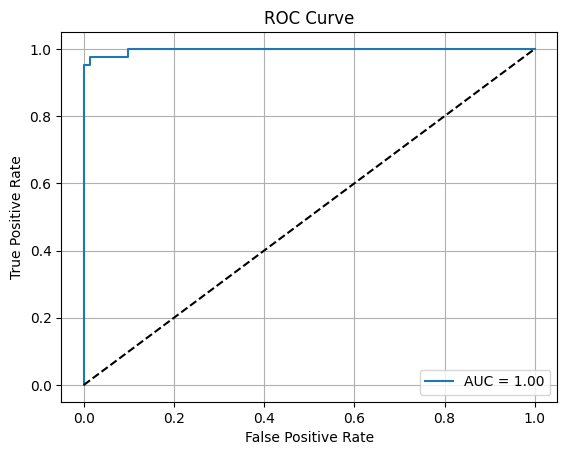

In [6]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [7]:
# Change threshold from 0.5 to 0.3
threshold = 0.3
y_custom = (y_proba >= threshold).astype(int)

# Evaluation at custom threshold
print(f"Confusion Matrix at Threshold = {threshold}:\n", confusion_matrix(y_test, y_custom))
print(classification_report(y_test, y_custom))


Confusion Matrix at Threshold = 0.3:
 [[67  4]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        71
           1       0.91      0.98      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



# Tune Threshold and Explain Sigmoid Function
The Sigmoid Function:
    σ(z) = 1 / (1 + e^(-z))

In Logistic Regression:
- Input (z) = weighted sum of features.
- Output (σ(z)) = probability of the positive class (1).
- By default, threshold = 0.5
  - If σ(z) > 0.5 → predict 1
  - If σ(z) < 0.5 → predict 0

Tuning the threshold (e.g., 0.3 or 0.6) helps in handling imbalanced data or reducing false negatives/positives based on problem needs.
